In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Hydrogen

The theory behind this computational analysis is given in the Onenote in the teams drive. However, relevant mathematics will be included.

The energy levels in the system is given by the function:

$$E = -\frac{m_e e^4}{32\pi^2\epsilon_{0}^2\hbar^2n^2}Z^2$$

where $m_e$ is the mass of the electron, $e$ is the fundamental charge of the electron, $\epsilon_{0}$ is the permittivity of free space, $\hbar$ is the value of $\frac{h}{2\pi}$ where $h$ is the value of Planck's constant, $n$ is just an integer and $Z$ is the charge of the nucleus.

However, we can change the system to included the reduced mass of hydrogen, $\mu_H$ where the reduced mass is given by
$$ \mu = \frac{m_em_p}{m_e+m_p} $$

As such, the energy levels in the system is given by the function:

$$E = -\frac{\mu e^4}{32\pi^2\epsilon_{0}^2\hbar^2n^2}Z^2$$

In [2]:
mu_H = (1.67262192e-27*9.1093837015e-31)/(1.67262192e-27+9.1093837015e-31)
print(mu_H)

def calc_E(Z, i):
    E =-1*((mu_H*(1.602176634e-19**4))/(2*((4*np.pi*8.8541878128e-12)**2)*((6.62607015e-34/(2*np.pi))**2)*(i**2))*(Z**2))*(1/1.602176634e-19)
    return E

array = []
for i in range(1,11):
    array.append(calc_E(1, i))
array

9.10442527651264e-31


[-13.5982872641624,
 -3.3995718160406,
 -1.5109208071291558,
 -0.84989295401015,
 -0.5439314905664959,
 -0.37773020178228894,
 -0.27751606661555916,
 -0.2124732385025375,
 -0.16788008968101728,
 -0.13598287264162398]

The wavelength from the function is given by the following equation:

$$ \lambda = \frac{hc}{\lvert{E_{f} - E_{i}}\rvert} $$

where $\lambda$ is the wavelength, $E_{f}$ is the energy of the final state, $E_{i}$ is the energy of the initial state.

In [3]:
def calc_wavelength(E_i, E_f):
    wavelength = (6.62607015e-34*2.99792458e8)/(abs((E_f - E_i)*1.602176634e-19))
    return wavelength

#Balmer Series 
array_ba = []
for i in range(2,10):
    wavelength = calc_wavelength(array[1], array[i])
    array_ba.append(wavelength)
array_ba

[6.564696063390804e-07,
 4.862737824733928e-07,
 4.341730200655293e-07,
 4.1029350396192514e-07,
 3.9712358901993746e-07,
 3.8901902597871426e-07,
 3.8365106863972225e-07,
 3.799013925573382e-07]

The Rydberg constant (inifnity) $R_\infty$ is given by the following equation:

$$ R_\infty = \frac{1}{\lambda (\frac{1}{n_{f}^2} - \frac{1}{n_{i}^2})} $$

where $\lambda$ is the wavelength, $n_{f}$ is the quantum number of the final state, $n_{i}$ is the quantum number of the initial state.

In [4]:
def calc_R_H(wavelength, n_f, n_i):
    R = 1/(wavelength*(1/(n_f**2) - 1/(n_i**2)))
    return R

array_R = []
for i in range(0,7):
    R = calc_R_H(array_ba[i], 2, i+3)
    array_R.append(R)
print("The value of the Hydrogen Rydberg constant is:", array_R[1])

The value of the Hydrogen Rydberg constant is: 10967758.340179803


The infinty Rydberg constant is now given by the following equation

$$R_\infty = R_H \frac{m_e}{\mu_H}$$

In [5]:
R_H = array_R[1]*(9.1093837015e-31/mu_H)
print("The value of the infinity Rydberg constant is:", R_H)

The value of the infinity Rydberg constant is: 10973731.56807257


# Deuterium

Now we can change the system to included the reduced mass $\mu$ of deuterium where the reduced mass is given by
$$ \mu = \frac{m_e(m_p+m_n)}{m_e+(m_p+m_n)} $$
As such, the energy levels in this semi classical model are given by 

$$E = -\frac{\mu e^4}{32\pi^2\epsilon_{0}^2\hbar^2n^2}Z^2$$

Since there is only 1 electron we will not include spin orbit effects.

In [6]:
mu_D = ((9.1091031e-31*(1.6726219e-27+1.674927471e-27)))/(9.1091031e-31+(1.6726219e-27+1.674927471e-27))

print(mu_D)

def calc_E_D(Z, i):
    E =-1*((mu_D*(1.602176634e-19**4))/(2*((4*np.pi*8.8541878128e-12)**2)*((6.62607015e-34/(2*np.pi))**2)*(i**2))*(Z**2))*(1/1.602176634e-19)
    return E

arrayD = []
for i in range(1,11):
    arrayD.append(calc_E_D(1, i))
arrayD

#Balmer Series 
array_baD = []
for i in range(2,10):
    wavelength = calc_wavelength(arrayD[1], arrayD[i])
    array_baD.append(wavelength)
array_baD

9.10662507271834e-31


[6.5631102955156e-07,
 4.861563181863407e-07,
 4.3406814123780424e-07,
 4.1019439346972503e-07,
 3.970276598521783e-07,
 3.889250545490726e-07,
 3.8355839389376886e-07,
 3.7980962358307865e-07]

The Rydberg constant (Deuterium) $R_D$ is given by the following equation:

$$ R_D = \frac{1}{\lambda(\frac{1}{n_{f}^2} - \frac{1}{n_{i}^2})} $$

where $\lambda$ is the wavelength, $n_{f}$ is the quantum number of the final state, $n_{i}$ is the quantum number of the initial state.

In [7]:
def calc_R_D(wavelength, n_f, n_i):
    R = 1/(wavelength*(1/(n_f**2) - 1/(n_i**2)))
    return R

array_R_D = []
for i in range(0,7):
    R = calc_R_D(array_baD[i], 2, i+3)
    array_R_D.append(R)
print("The value of the Deuteriun Rydberg constant is:", array_R[0])

The value of the Deuteriun Rydberg constant is: 10967758.340179801


The infinity Rydberg constant is now given by the following equation

$$R_\infty = R_{D} \frac{m_e}{\mu_D}$$

In [8]:
R_infinity_D = array_R_D[0]*(9.1093837015e-31/mu_D)
print("The value of the inifinity Rydberg constant is:", R_infinity_D)

The value of the inifinity Rydberg constant is: 10973731.568072572


# Helium + ion

Now we can change the system to included the reduced mass $\mu$ of the helium ion where the reduced mass is given by
$$ \mu = \frac{2m_e(m_p+m_n)}{m_e+2(m_p+m_n)} $$
Looking at this problem using the energy levels from Schrodinger's model of the atom

$$E = -\frac{\mu e^4}{32\pi^2\epsilon_{0}^2\hbar^2n^2}Z^2$$

Therefore, we must use the less used Bohr's model in order to predict the angles measured 

Since there is only 1 electron we will not include spin orbit effects.

In [9]:
mu_He = (9.1091031e-31*(2*1.67262192369e-27+2*1.67492749804e-27))/(9.1091031e-31+(2*1.67262192369e-27+2*1.67492749804e-27))
print(mu_He)

def calc_E_He(Z, i):
    E =-1*((mu_He*(1.602176634e-19**4))/(2*((4*np.pi*8.8541878128e-12)**2)*((6.62607015e-34/(2*np.pi))**2)*(i**2))*(Z**2))*(1/1.602176634e-19)
    return E
    return E

arrayHe = []
for i in range(1,11):
    arrayHe.append(calc_E_He(2, i))
print(arrayHe)

#Balmer Series 
array_baHe = []
for i in range(4,10):
    wavelength = calc_wavelength(arrayHe[3], arrayHe[i])
    array_baHe.append(wavelength)

print(array_baHe)

9.107863917825278e-31
[-54.413692750929044, -13.603423187732261, -6.045965861214339, -3.4008557969330653, -2.1765477100371617, -1.5114914653035847, -1.110483525529164, -0.8502139492332663, -0.6717739845793709, -0.5441369275092904]
[1.012687899069166e-06, 6.562217585968197e-07, 5.413277133206088e-07, 4.860901915531997e-07, 4.5430737133625984e-07, 4.340090996010712e-07]


In [10]:
def calc_E_He(Z, i):
    E =-1*((mu_He*(1.602176634e-19**4))/(2*((4*np.pi*8.8541878128e-12)**2)*((6.62607015e-34/(2*np.pi))**2)*(i**2))*(Z**2))*(1/1.602176634e-19)
    return E

arrayHe = []
for i in range(1,12):
    arrayHe.append(calc_E_He(2, i))
print(arrayHe)

#Balmer Series 
array_baHe = []
for i in range(4,11):
    wavelength = calc_wavelength(arrayHe[3], arrayHe[i])
    array_baHe.append(wavelength)

print(array_baHe)

[-54.413692750929044, -13.603423187732261, -6.045965861214339, -3.4008557969330653, -2.1765477100371617, -1.5114914653035847, -1.110483525529164, -0.8502139492332663, -0.6717739845793709, -0.5441369275092904, -0.4496999400903227]
[1.012687899069166e-06, 6.562217585968197e-07, 5.413277133206088e-07, 4.860901915531997e-07, 4.5430737133625984e-07, 4.340090996010712e-07, 4.2012080841383695e-07]


The Helium Rydberg constant $R_{He}$ is given by the following equation:

$$ R_{He} = \frac{1}{\lambda (\frac{1}{n_{f}^2} - \frac{1}{n_{i}^2})} $$

where $\lambda$ is the wavelength, $n_{f}$ is the quantum number of the final state, $n_{i}$ is the quantum number of the initial state.

In [11]:
def calc_R_He(wavelength, n_f, n_i):
    R = 1/(wavelength*(1/(n_f**2) - 1/(n_i**2)))
    return R

array_R_He = []
for i in range(0,6):
    R = calc_R_He(array_baHe[i], 4, i+5)
    array_R_He.append(R)
print(array_R_He)
print("The value of the Helium Rydberg constant is", array_R_He[0])

[43887602.967603855, 43887602.96760385, 43887602.96760385, 43887602.96760385, 43887602.96760385, 43887602.96760385]
The value of the Helium Rydberg constant is 43887602.967603855


The infinity Rydberg constant is now given by the following equation

$$R_\infty = R_{He}\frac{m_e}{\mu_{He}}\frac{1}{Z^2}$$

In [12]:
R_He = array_R_He[0]*(9.1093837015e-31/mu_He)
print("The value of the infinty Rydberg constant is:", R_He/4)

The value of the infinty Rydberg constant is: 10973731.568072574


In [13]:
R_infinity=10973731.56816 
R_He = (mu_He/9.1091031e-31)*R_infinity

In [14]:
for i in range(3,6):
    wavelength = 1/(R_He*(0.25-(1/(i**2))))
    print(wavelength)

6.562015446214892e-07
4.860752182381402e-07
4.33995730569768e-07


# Graph showing the Rydberg constant

[ 987471.06677109 1523875.1030418  1847309.81878945 2057231.38910643
 2201152.92661593 2304099.1557992 ]
[1.012687899069166e-06, 6.562217585968197e-07, 5.413277133206088e-07, 4.860901915531997e-07, 4.5430737133625984e-07, 4.340090996010712e-07, 4.2012080841383695e-07]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


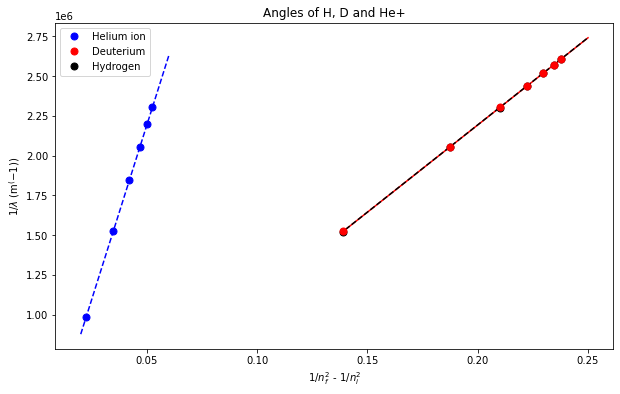

In [61]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

p = np.zeros(7)
k = np.zeros(6)
inversewavelengthH = np.zeros(7)
inversewavelengthD = np.zeros(7)
inversewavelengthHe = np.zeros(6)

for i in range(0,7):
    p[i] = (1/2**2) - (1/(i+3)**2)
    inversewavelengthH[i] = 1/array_ba[i]
    inversewavelengthD[i] = 1/array_baD[i]
    
for i in range(0,6):
    k[i] = (1/4**2) - (1/(i+5)**2)
    inversewavelengthHe[i] = 1/array_baHe[i]

print(inversewavelengthHe)
print(array_baHe)

ax.errorbar(p,           
             inversewavelengthH,                   
             marker='o',             
             markersize = 7,        
             color='black',         
             ecolor='black',        
             markerfacecolor='black',
             linestyle='none',       
             capsize=6,  
             label = "Hydrogen",
             )
ax.errorbar(p,           
             inversewavelengthD,                   
             marker='o',             
             markersize = 7,        
             color='red',         
             ecolor='red',        
             markerfacecolor='red',
             linestyle='none',       
             capsize=6,  
             label = "Deuterium",
             )
ax.errorbar(k,           
             inversewavelengthHe,                   
             marker='o',             
             markersize = 7,        
             color='blue',         
             ecolor='blue',        
             markerfacecolor='blue',
             linestyle='none',       
             capsize=6,  
             label = "Helium ion",
             )

def straight_fit(z, a, b):
    mag = a * z + b
    return(mag)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)

popt, pcov = curve_fit(straight_fit, p, inversewavelengthH)

a = popt[0]
b = popt[1]

z = np.linspace(0.14, 0.25, 100)
y = np.linspace(0.02, 0.06 , 100)

ax.plot(z, straight_fit(z, a, b), color='red', ls='-', label='best fit')

popt, pcov = curve_fit(straight_fit, p, inversewavelengthD)

c = popt[0]
d = popt[1]

ax.plot(z, straight_fit(z, c, d), color='black', ls='--', label='best fit')

popt, pcov = curve_fit(straight_fit, k, inversewavelengthHe)

e = popt[0]
f = popt[1]

ax.plot(y, straight_fit(y, e, f), color='blue', ls='--', label='best fit')

ax.set_xlabel('1/$n_f^2$ - 1/$n_i^2$')
ax.set_ylabel('$1/\lambda}$ (m$^(-1)$)')
ax.set_title('Angles of H, D and He+')
plt.show()

[ 987471.06677109 1523875.1030418  1847309.81878945 2057231.38910643
 2201152.92661593 2304099.1557992 ]
[1.012687899069166e-06, 6.562217585968197e-07, 5.413277133206088e-07, 4.860901915531997e-07, 4.5430737133625984e-07, 4.340090996010712e-07, 4.2012080841383695e-07]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


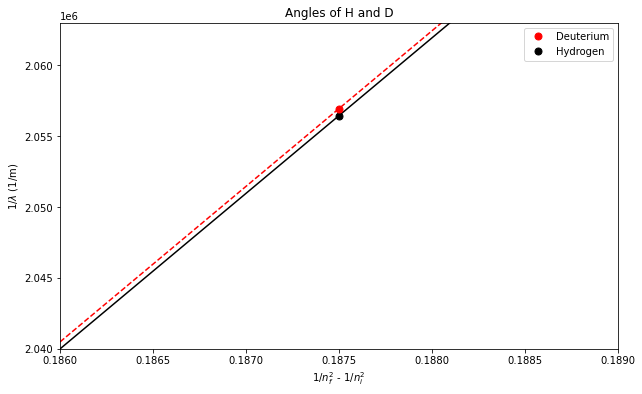

In [59]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

p = np.zeros(7)
k = np.zeros(6)
inversewavelengthH = np.zeros(7)
inversewavelengthD = np.zeros(7)
inversewavelengthHe = np.zeros(6)

for i in range(0,7):
    p[i] = (1/2**2) - (1/(i+3)**2)
    inversewavelengthH[i] = 1/array_ba[i]
    inversewavelengthD[i] = 1/array_baD[i]
    
for i in range(0,6):
    k[i] = (1/4**2) - (1/(i+5)**2)
    inversewavelengthHe[i] = 1/array_baHe[i]

print(inversewavelengthHe)
print(array_baHe)

ax.errorbar(p,           
             inversewavelengthH,                   
             marker='o',             
             markersize = 7,        
             color='black',         
             ecolor='black',        
             markerfacecolor='black',
             linestyle='none',       
             capsize=6,  
             label = "Hydrogen",
             )
ax.errorbar(p,           
             inversewavelengthD,                   
             marker='o',             
             markersize = 7,        
             color='red',         
             ecolor='red',        
             markerfacecolor='red',
             linestyle='none',       
             capsize=6,  
             label = "Deuterium",
             )

def straight_fit(z, a, b):
    mag = a * z + b
    return(mag)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)

popt, pcov = curve_fit(straight_fit, p, inversewavelengthH)

a = popt[0]
b = popt[1]

z = np.linspace(0.14, 0.25, 100)
y = np.linspace(0, 0.06 , 100)

ax.plot(z, straight_fit(z, a, b), color='black', ls='-', label='best fit')

popt, pcov = curve_fit(straight_fit, p, inversewavelengthD)

c = popt[0]
d = popt[1]

ax.plot(z, straight_fit(z, c, d), color='red', ls='--', label='best fit')

ax.set_xlabel('1/$n_f^2$ - 1/$n_i^2$')
ax.set_ylabel('$1/\lambda$ (1/m)')
ax.set_title('Angles of H and D')
plt.xlim(0.186, 0.189)
plt.ylim(2.04e6, 2.063e6)
plt.show()

# Producing the angles

When passed through a diffraction grating, the angles where the spectral lines produced are obeyed by the following equation:

$$ d\sin(\theta) = n\lambda $$

where $d$ is the grating spacing, $\theta$ is the angular seperation, $n$ which is just an integer ($n = 1, 2, 3, ...$) which is equal to $1$ and $\lambda$ which is the wavelength. As such, the angle is given by:

$$ \theta = \arcsin \Biggl( \frac{n\lambda}{d} \Biggr) $$

In [18]:
array_baHe

[1.012687899069166e-06,
 6.562217585968197e-07,
 5.413277133206088e-07,
 4.860901915531997e-07,
 4.5430737133625984e-07,
 4.340090996010712e-07,
 4.2012080841383695e-07]

In [19]:
d = 1.6966e-6

#Since the experimentalists can only see 3 angles it must be noted that only 3 angles work
anglesH = np.zeros(7)
for i in range(0,7):
    anglesH[i] = ((180/np.pi)*np.arcsin(((1)*array_ba[i])/d))

anglesD = np.zeros(7)
for i in range(0,7):
     anglesD[i] = ((180/np.pi)*np.arcsin(((1)*array_baD[i])/d))

anglesHe = np.zeros(5)
for i in range(0,5):
    anglesHe[i] = ((180/np.pi)*np.arcsin(((1)*array_baHe[i])/d))

In [20]:
print(anglesHe)

[36.64766556 22.75468527 18.60646197 16.64903543 15.53191992]


In [21]:
print(anglesD)

[22.75795452 16.65136632 14.82371403 13.99128871 13.53349148 13.25220906
 13.06608444]


In [22]:
anglesH

array([22.76376206, 16.65550687, 14.82737786, 13.99473813, 13.53682364,
       13.2554694 , 13.06929735])